![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

# Teste 2: Mais bisseção

Vamos continuar estudando o método de bisseção, agora com garantias de erros absolutos e relativos ao mesmo tempo.

## Questão 1: uma função auxiliar

Quando a bisseção retorna uma "raiz", ela dá o ponto médio de um intervalo $[a,b]$, onde temos certeza que há uma raiz de $f$.

Escreva uma função `absrel(a,b)` que, dado um intervalo $[a,b]$, retorna o maior erro absoluto e o maior erro relativo que pode ocorrer ao considerar que a raiz é o ponto médio deste intervalo.

In [1]:
import numpy as np
from numpy import infty

In [2]:
def absrel(a,b):
    r=(a+b)/2
    E_absoluto = abs(b-r)
    if a*b<0:
        return E_absoluto, +infty
    if a<b:
        E_relativo = abs((r-a)/a)
    else:
        E_relativo = abs((r-b)/b)
    if a*b<0:
        return E_absoluto, +infty 
    return E_absoluto, E_relativo

In [3]:
absrel(10,11)

(0.5, 0.05)

In [4]:
assert absrel(1,2) == (.5, .5)
assert absrel(10,11) == (0.5, 0.05)

In [5]:
assert absrel(-2,1) == (1.5, +infty)

Porquê o erro relativo do intervalo $[-2,1]$ é infinito?

Pela propria formula do erro relativo. nela temos (x-z)/z. como estamos atrás do maior erro, se o intervalo passa por zero podemos escolher um numero muito proximo de zero como nosso chute pra raiz, como o limite de a/x com a pertencente ao real e x tendendo a zero é infinito, esse é o nosso maior valor que podemos ter.

## Questão 2: Outros retornos na bisseção

Modifique o método da bisseção para terminar quando o erro absoluto **e** o erro relativo
forem menores do que (ou iguais às) tolerâncias dadas em argumento.

Retorne uma tripla contendo, nesta ordem:
- uma estimativa para a raiz $z$,
- uma estimativa para o erro absoluto $e_{abs}$,
- uma estimativa para o erro relativo $e_{rel}$.

In [6]:
def Err_biss(a,b):
    r=(a+b)/2
    E_absoluto = abs((b-a)/2)
    if a*b<0:
        return E_absoluto, +infty
    if a<b:
        E_relativo = abs((r-b)/b)
    else:
        E_relativo = abs((r-a)/a)
    return E_absoluto, E_relativo

def bissecao_step(f,a,b):
    z = (a+b)/2
    if f(a)*f(z)<0:
        b=z
    else:
        a=z
    return a,b

def bissecao(f, a, b, abstol=1e-10, reltol=1e-10):
    """ esse metodo para achar a raiz, se basea no fato que f(a) e f(b) possuem sinais opostos, ou seja,
    entre eles temos uma raiz. Com essa informação, vamos sempre "cortando" o intervalo na metade até que
    o intevalo fique tão pequeno quanto o computador aguenta, nisso aproximamos nossa raíz com o ponto medio
    desse intervalo
    O erro absoluto é a maior distancia do nosso chute atual para o chute anterior, e o erro relativo é o
    nosso chute atual menos o anterior sobre o anterior, ou seja é a porcentagem de desvio que o nosso erro]
    tomou"""
    while True:
        e_abs, e_rel = Err_biss(a,b)
        if e_abs<abstol and e_rel<reltol:
            break
        a,b = bissecao_step(f, a, b)
    return (a+b)/2,e_abs,e_rel

Não se preocupe em obter valores iguais para as cotas superiores dos erros absoluto e relativo.

O importante é que estas estimativas sejam **coerentes** com os requisitos do método da bisseção:

- o erro absoluto real (ou seja, a diferença entre a raiz certa e a raiz calculada) deve ser menor do que a estimativa do erro absoluto,
- o erro relativo real deve ser menor do que a estimativa do erro relativo.

Note que é exatamente isso que vai ser testado em seguida!

In [7]:
bissecao(np.cos, 1,5)

(1.5707963267923333, 5.820766091346741e-11, 3.7056147839468295e-11)

In [8]:
x,err,rel = bissecao(np.sin,1,5)

# Testando que o valor retornado está perto da resposta, e satisfaz as próprias estimativas
assert abs(x - np.pi)/np.pi < rel
assert abs(x - np.pi) < err

In [9]:
# Testando que sai pela razão certa
assert rel < 1e-10
assert err < 1e-10

In [10]:
def f(x):
    return ((x**2 - 2)**2 - 2)**2 - 2 - x

In [11]:
x,err,rel = bissecao(f,1.4,1.6,reltol=1e-12)

# Testando que o valor retornado está perto da resposta, e satisfaz as próprias estimativas
v = 1.532088886238
assert abs(x - v)/v < rel
assert abs(x - v) < err

In [12]:
# Testando que sai pela razão certa
assert err < 1e-10
assert rel < 1e-12

## Questão 3: extremidades da bisseção

Modifique a sua implementação da bisseção para retornar uma lista com os intervalos considerados,
em ordem decrescente.

In [13]:
def Err_biss(a,b):
    r=(a+b)/2
    E_absoluto = abs((b-a)/2)
    if a*b<=0:
        return E_absoluto, +infty
    if a<b: # min(a, b)
        E_relativo = abs((r-b)/b)
    else:
        E_relativo = abs((r-a)/a)
    return E_absoluto, E_relativo
def bissecao_step(f,a,b):
    z = (a+b)/2
    if f(a)*f(z)<0:
        b=z
    else:
        a=z
    return a,b
def bissecao_extremidades(f,a,b, abstol=1e-10,reltol=1e-10):
    """ Função que retorna as uma lista contendo os intervalos que a função f possui uma raiz, o metodo 
    usado é igual ao da função bissecao"""
    l=[]
    while True:
        l.append([a,b])
        e_abs, e_rel = Err_biss(a,b)
        if e_abs<abstol and e_rel<reltol:
            break
        a,b = bissecao_step(f, a, b) 
    return l

In [14]:
# Vendo alguns dos intervalos iniciais
l = bissecao_extremidades(np.sin,1,5)
for I in l[:5]:
    print(I)

[1, 5]
[3.0, 5]
[3.0, 4.0]
[3.0, 3.5]
[3.0, 3.25]


In [15]:
lista_intervalos = bissecao_extremidades(np.sin,100,103)

Ifinal = lista_intervalos[-1]
(af, bf) = Ifinal

assert abs(bf - af) <= 2e-10
assert 35 <= len(lista_intervalos) <= 40

In [16]:
lista_intervalos = bissecao_extremidades(np.sin,100,103, abstol=1e-12, reltol=1e-12)

Ifinal = lista_intervalos[-1]
(af, bf) = Ifinal

assert abs(bf - af) <= 2e-12
assert abs(af - 32*np.pi) <= 2e-12
assert abs(bf - 32*np.pi) <= 2e-12
assert 40 <= len(lista_intervalos) <= 45

In [17]:
lista_intervalos = bissecao_extremidades(f,-0.5,0, abstol=1e-8, reltol=1e-12)

(af, bf) = lista_intervalos[-1]
x = (af+bf)/2

v = -0.4450418679126287
assert(abs(x - v)/v < 1e-12)
assert(abs(x - v) < 1e-8)

In [18]:
lista_intervalos = bissecao_extremidades(f,-0.5,0, abstol=1e-8, reltol=1e-12)

(af, bf) = lista_intervalos[-1]
x = (af+bf)/2

assert 40 <= len(lista_intervalos) <= 45

## Questão 4: Gráficos

Faça o gráfico do tamanho dos intervalos, em função do número de iterações,
para a bisseção do cosseno entre 0 e 3, com as tolerâncias padrão.

In [19]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'tamanho dos intervalos em função das interações')

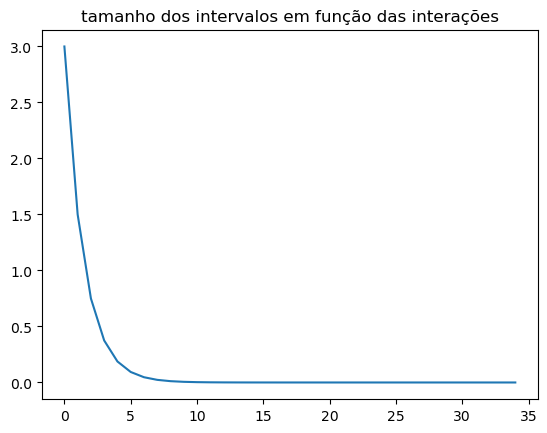

In [20]:
lx=bissecao_extremidades(np.cos,0,3)
ly=[]
for (a,b) in lx:
    ly.append(abs(b-a))
x=range(0,len(lx))
y=[ly[i] for i in x]
plt.plot(x,y)
# Não apague a linha abaixo, ela faz os assert's dos gráficos darem certo
ax = plt.gca()
ax.set_title("tamanho dos intervalos em função das interações")

In [21]:
assert len(ax.lines) == 1
assert len(ax.get_title()) >= 10

In [22]:
linha = ax.lines[0]
assert 5e-11 < min(linha.get_ydata()) < 2e-10
assert max(linha.get_ydata()) == 3

Agora, faça um gráfico com
- o comprimento dos intervalos
- a distância entre a extremidade inferior e a raiz correta
- a distância entre a extremidade superior e a raiz correta

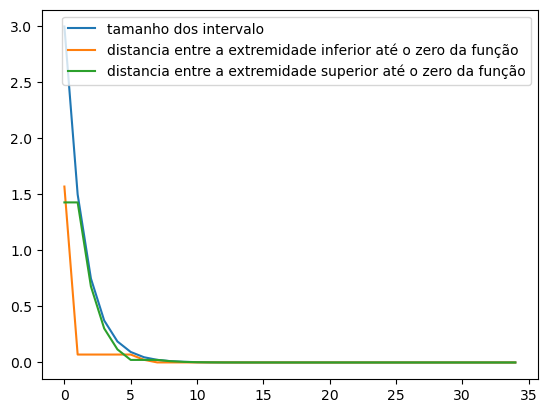

In [23]:
lx=bissecao_extremidades(np.cos,0,3)
z=(np.pi)/2
ly=[]
l_inf=[]
l_sup=[]
for (a,b) in lx:
    ly.append(abs(b-a))
    inf=min(set((a,b)))
    l_inf.append(abs(inf-z))
    sup=max((set((a,b))))
    l_sup.append(abs(sup-z))
x=range(0,len(lx))
y1=[ly[i] for i in x]
y2=[l_inf[i] for i in x]
y3=[l_sup[i] for i in x]
plt.plot(x,y1,label='tamanho dos intervalo')
plt.plot(x,y2,label='distancia entre a extremidade inferior até o zero da função')
plt.plot(x,y3,label='distancia entre a extremidade superior até o zero da função')
plt.legend()
ax = plt.gca()

In [24]:
assert len(ax.lines) == 3
assert len(ax.get_legend().texts) == 3

Repita o gráfico acima para o polinômio $f$ acima, com tolerância `1e-13`, tanto absoluta como relativa.

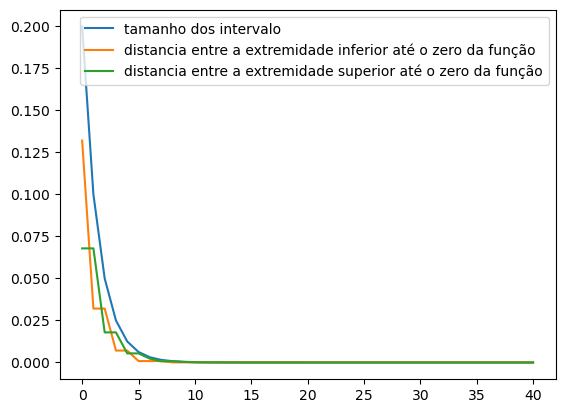

In [25]:
lx=bissecao_extremidades(f,1.4,1.6,abstol=1e-13,reltol=1e-13)
z,err,rel = bissecao(f,1.4,1.6,reltol=1e-12)
ly=[]
l_inf=[]
l_sup=[]
for (a,b) in lx:
    ly.append(abs(b-a))
    inf=min(set((a,b)))
    l_inf.append(abs(inf-z))
    sup=max((set((a,b))))
    l_sup.append(abs(sup-z))
x=range(0,len(lx))
y1=[ly[i] for i in x]
y2=[l_inf[i] for i in x]
y3=[l_sup[i] for i in x]
plt.plot(x,y1,label='tamanho dos intervalo')
plt.plot(x,y2,label='distancia entre a extremidade inferior até o zero da função')
plt.plot(x,y3,label='distancia entre a extremidade superior até o zero da função')
plt.legend()
ax = plt.gca()

In [26]:
assert len(ax.lines) == 3
assert len(ax.get_legend().texts) == 3

In [27]:
for l in ax.lines:
    assert 40 <= len(l.get_xdata()) <= 45

O que você observa de comum nos gráficos com relação aos erros entre as extremidades dos intervalos?

Bom, eles decrescem intercaladamente, ou seja, enquanto um varia o outro fica estático. porém no grafico do cosseno, temos um intervalo maior em que a extremidade inferior fica fixa e a superior varia, enquanto na função f ela diminui de forma mais "alternada". 